# RLab04 - Gabriele Bertinelli (1219907 - tri)

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(scales)
library(lubridate)
library(cowplot)
library(binom)
library(stats)
library(emdbook)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## 1)

### 1.1)

Mean Variance Median  
1 6.2  0.62     6.167292

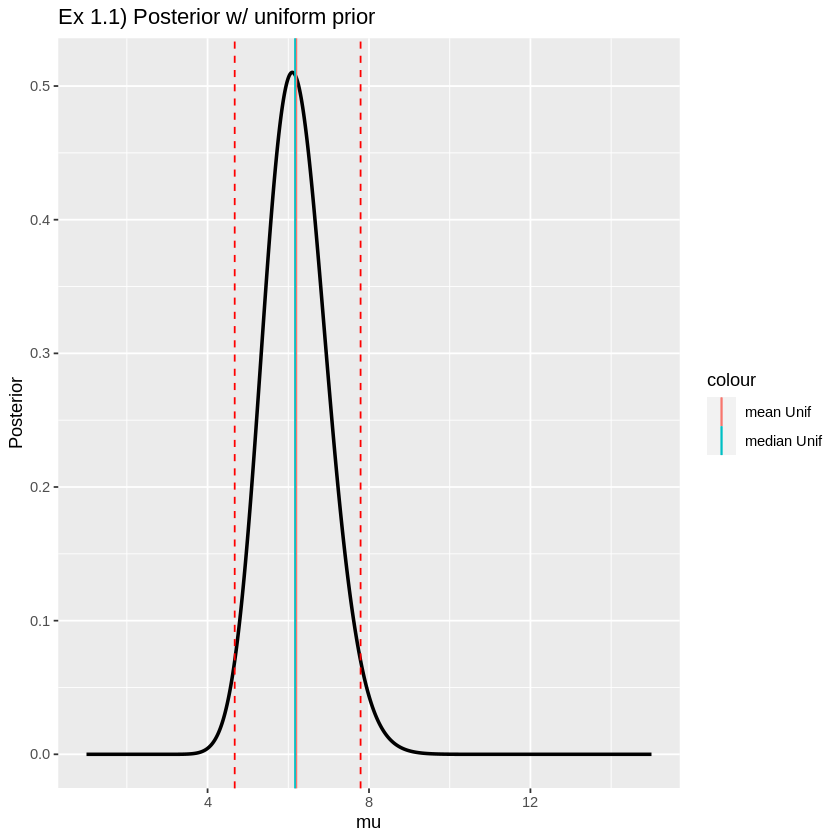

In [2]:
# Poisson distribution
y = c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n.sample <- 4000
delta.mu <- (15-1)/n.sample
mu <- seq(from= 1, to=15, length.out = n.sample)

likelihood <- rep(1, times=n.sample)
for (l in y){
    likelihood <- likelihood * dpois(x=l, lambda = mu)
    }

p.star_Unif <- likelihood * dunif(mu, min=1, max=15)
p.norm_Unif <- p.star_Unif / (delta.mu *sum(p.star_Unif))

#mean, variance, median
mean_Unif <- delta.mu * sum(mu*p.norm_Unif)
variance_Unif <- delta.mu * sum(((mean_Unif -mu)**2)*p.norm_Unif) 
int_median_Unif <- 0
list_median <- c()
for (m in seq(1, n.sample)){
    list_median <- c(list_median, p.norm_Unif[m]*delta.mu)
    int_median_Unif <- sum(list_median)
    if (int_median_Unif > 0.5){
        median_Unif <- mu[m]
        return (median_Unif)
        break
        }
    }

Unif_result <- tibble(
                Mean = c(mean_Unif),
                Variance = c(variance_Unif),
                Median = c(median_Unif)
                )
Unif_result

#95% credibiility interval
lower_bound_Unif <- ncredint(mu, p.norm_Unif, leve=0.95)[['lower']]
upper_bound_Unif <- ncredint(mu, p.norm_Unif, level=0.95)[['upper']]

#plot
plt_Unif <- ggplot() + 
    geom_line(aes(mu, p.norm_Unif), linewidth=1)+
    geom_vline(aes(xintercept=mean_Unif, color='mean Unif'))+
    geom_vline(aes(xintercept=median_Unif, color='median Unif'))+
    geom_vline(aes(xintercept=lower_bound_Unif), color='red', linetype='dashed')+
    geom_vline(aes(xintercept=upper_bound_Unif), color='red', linetype='dashed')+
    labs(title='Ex 1.1) Posterior w/ uniform prior', x='mu', y='Posterior')

ggsave("plt_Unif.png", plt_Unif, width =10, height = 8, dpi = 300)

plt_Unif

### 1.2)

Mean Variance Median  
1 6.15 0.615    6.167292

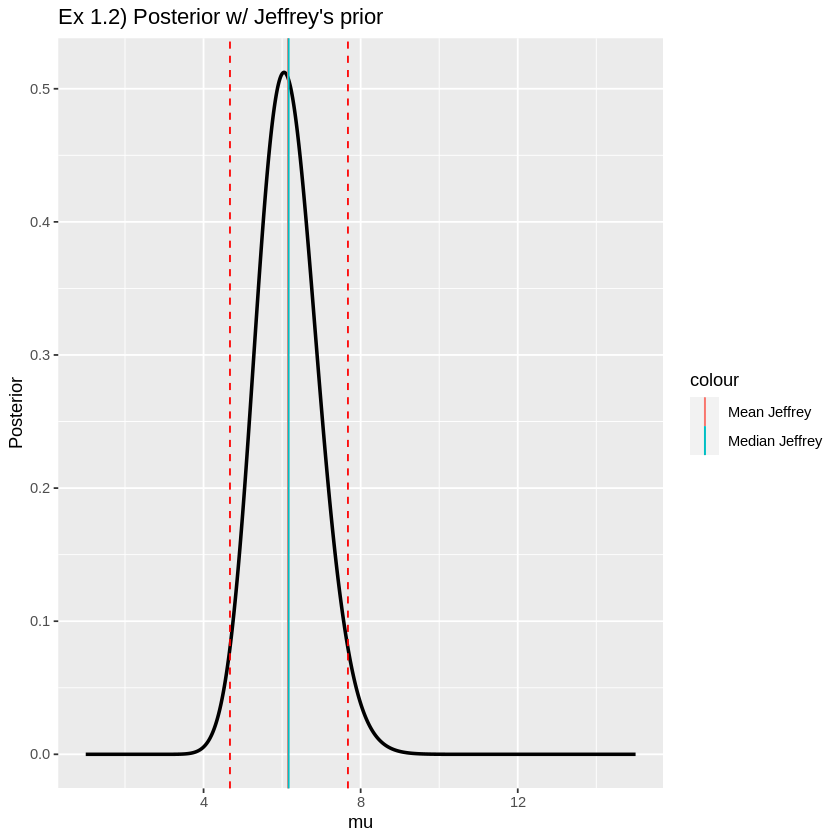

In [3]:
# Poisson distribution
p.star_Jeffrey <- likelihood * (1/sqrt(mu))
p.norm_Jeffrey <- p.star_Jeffrey / (delta.mu *sum(p.star_Jeffrey))

#mean, variance, median
mean_Jeffrey <- delta.mu * sum(mu*p.norm_Jeffrey)
variance_Jeffrey <- delta.mu * sum(((mean_Jeffrey - mu)**2)*p.norm_Jeffrey) ## not sure
int_median_Jeffrey <- 0
list_median <- c()
for (m in seq(1, n.sample)){
    list_median <- c(list_median, p.norm_Unif[m]*delta.mu)
    int_median_Jeffrey <- sum(list_median)
    if (int_median_Jeffrey > 0.5){
        median_Jeffrey <- mu[m]
        return (median_Jeffrey)
        break
        }
    }

Jeffrey_result <- tibble(
                Mean = c(mean_Jeffrey),
                Variance = c(variance_Jeffrey),
                Median = c(median_Jeffrey))
Jeffrey_result

#95% credibiility interval
lower_bound_Jeffrey <- ncredint(mu, p.norm_Jeffrey, leve=0.95)[['lower']]
upper_bound_Jeffrey <- ncredint(mu, p.norm_Jeffrey, level=0.95)[['upper']]

#plot
plt_Jeffrey <- ggplot()+ 
    geom_line(aes(mu,p.norm_Jeffrey), linewidth=1)+
    geom_vline(aes(xintercept=mean_Jeffrey, color='Mean Jeffrey'))+
    geom_vline(aes(xintercept=median_Jeffrey, color='Median Jeffrey'))+
    geom_vline(aes(xintercept=lower_bound_Jeffrey), color='red', linetype='dashed')+
    geom_vline(aes(xintercept=upper_bound_Jeffrey), color='red', linetype='dashed')+
    labs(title="Ex 1.2) Posterior w/ Jeffrey's prior", x='mu', y='Posterior')
ggsave("plt_Jeffrey.png", plt_Jeffrey, width =10, height = 8, dpi = 300)

plt_Jeffrey

### 1.3)

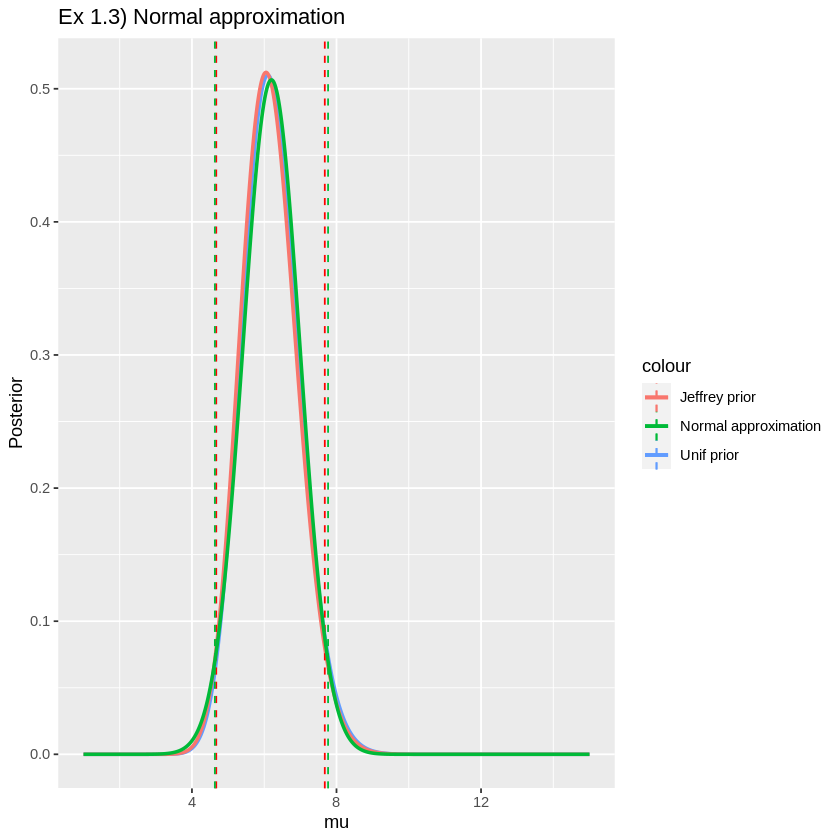

In [5]:
# using the average of the params found before as new params for the normal approx
mean_normal_approx <- mean(mean_Unif, mean_Jeffrey)
std_normal_approx <- sqrt(mean(variance_Unif, variance_Jeffrey))
p.normal_approx <- dnorm(mu, mean = mean_normal_approx, sd = std_normal_approx)

lower_bound_approx <- ncredint(mu, p.normal_approx, level=0.95)[['lower']]
upper_bound_approx <- ncredint(mu, p.normal_approx, level=0.95)[['upper']]


plt_norm <- ggplot() +
    geom_line(aes(mu, p.norm_Unif, color='Unif prior'), linewidth=1) +

    geom_line(aes(mu, p.norm_Jeffrey, color='Jeffrey prior'), linewidth=1)+
    geom_vline(aes(xintercept=lower_bound_Jeffrey), color='red', linetype='dashed')+
    geom_vline(aes(xintercept=upper_bound_Jeffrey), color='red', linetype='dashed')+

    geom_line(aes(mu, p.normal_approx, color='Normal approximation'), linewidth=1)+
    geom_vline(aes(xintercept=lower_bound_approx, colour='Normal approximation'), linetype='dashed')+
    geom_vline(aes(xintercept=upper_bound_approx, colour='Normal approximation'), linetype='dashed')+

    labs(title='Ex 1.3) Normal approximation', x='mu', y='Posterior')

ggsave("plt_norm.png", plt_norm, width =10, height = 8, dpi = 300)

plt_norm

## 2)

### 2.1)

Q: What is the probability distribution of y, the number of times the new method fails to detect the disease?

A: It's a Bernoulli's distribution

### 2.2)

The frequentist estimator of the failure probability of the new method is simply the proportion of cases in which the new method failed to detect the disease.

In [8]:
n <- 75
y <- 6
failure_prob <- y/n
cat(paste('The failure probability is', round(failure_prob, 4)*100),'%')


The failure probability is 8 %

### 2.3)

To compute the posterior probability of y, we assume a beta prior distribution with mean value of 0.15 and standard deviation of 0.14. In R, we can use the `rbeta()` function to generate a random sample from the beta distribution, and the `dbinom()` function to compute the binomial likelihood function.

Mean       Variance    
1 0.08478674 0.0009520625

NULL

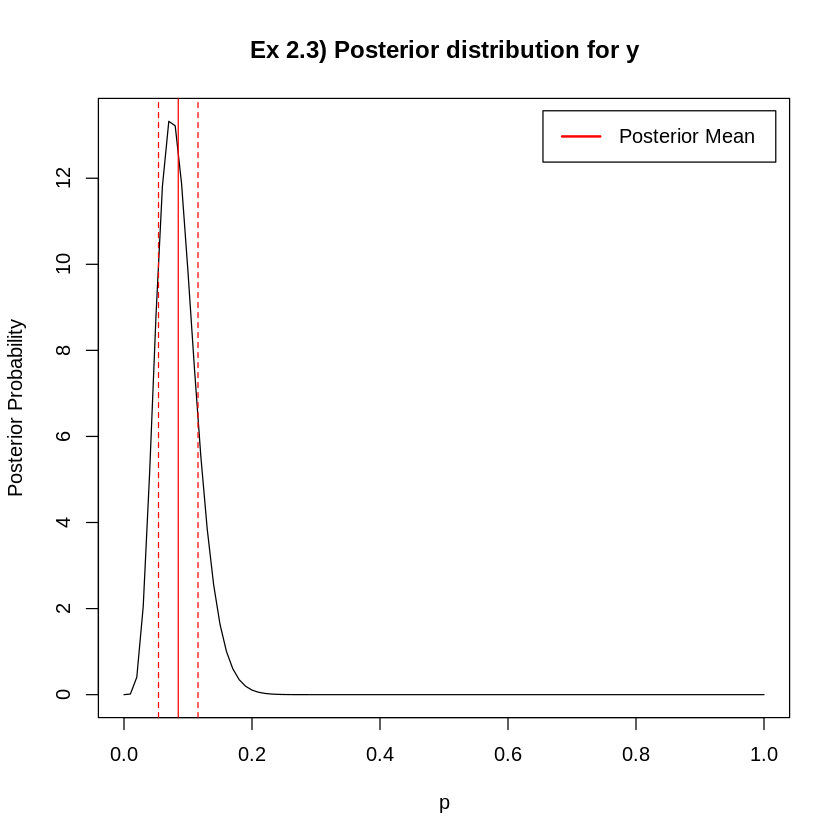

In [11]:
n <- 75
y <- 6
alpha <- 0.15^2*(1-0.15)/0.14^2 - 0.15
beta <- alpha*(1-0.15)/0.15
posterior_density <- dbeta(seq(0, 1, 0.01), shape1 = alpha + y, shape2 = beta + n - y)

mean_posterior <- (y+alpha)/(n+alpha+beta)
variance_posterior <- (y+alpha)*(n+beta-y)/((n+alpha+beta)^2*(n+alpha+beta+1))

plt_23 <- plot(seq(0, 1, 0.01), posterior_density, type = "l", xlab = "p", ylab = "Posterior Probability", main = "Ex 2.3) Posterior distribution for y")
abline(v = mean_posterior, col = "red")
abline(v = mean_posterior - sqrt(variance_posterior), col = "red", lty = "dashed")
abline(v = mean_posterior + sqrt(variance_posterior), col = "red", lty = "dashed")
legend("topright", inset=0.02, legend = c("Posterior Mean"), col = "red", lty = 1, lwd=2)

t <- tibble('Mean' = mean_posterior,
           'Variance' = variance_posterior)
t

ggsave("plt_23.png", plt_23, width =10, height = 8, dpi = 300)

plt_23

### 2.4) 

To test the hypothesis that the new test is no better than the traditional method if the probability of failing to detect the disease in ill patients is greater than or equal to 15%, we can use Bayesian hypothesis testing. We will assume a beta prior distribution with mean value of 0.15 and standard deviation of 0.14, and a binomial likelihood function with sample size `n = 75` and number of cases in which the new method fails to detect the disease `y = 6`. We will compute the posterior probability of the null hypothesis that the failure probability of the new method is greater than or equal to 15%, and compare it to the posterior probability of the alternative hypothesis that the failure probability of the new method is less than 15%.

In R, we can use the `pbeta()` function to compute the cumulative distribution function for the beta distribution, and the `qbeta()` function to compute the quantile function for the beta distribution.

In [12]:
# posterior probability of null hypothesis that failure probability is >= 15%
null_posterior <- pbeta(0.15, shape1 = alpha + y, shape2 = beta + n - y)

# posterior probability of alternative hypothesis that failure probability is < 15%
alt_posterior <- 1 - null_posterior

# print results
cat(paste("Posterior probability of null hypothesis: ", round(null_posterior, 4)*100, "%\n"))
cat(paste("Posterior probability of alternative hypothesis: ", round(alt_posterior, 4)*100, "%\n"))

# Bayesian hypothesis test at 5% level of significance
if (null_posterior < 0.05) {
  cat("Reject null hypothesis\n")
} else {
  cat("Fail to reject null hypothesis\n")
}


Posterior probability of null hypothesis:  96.87 %
Posterior probability of alternative hypothesis:  3.13 %
Fail to reject null hypothesis


Since the posterior probability of the null hypothesis is greater than 5%, we fail to reject the null hypothesis at the 5% level of significance, and conclude that the new method is not significantly better than the traditional method.

### 2.5)

In [13]:
p_null <- 0.15
p_alt <- 0.15 - 0.01
alpha <- 0.05

# perform binomial test
test_result <- binom.test(x = y, n = n, p = p_null, alternative = "less", conf.level = 0.95)

# print test result
cat("Binomial test result:\n")
cat("Alternative hypothesis: p < 15%\n")
cat("Test statistic: ", test_result$statistic, "\n")
cat("p-value: ", round(test_result$p.value,4)*100, "%\n")
cat("95% confidence interval: (", test_result$conf.int[1], ", ", test_result$conf.int[2], ")\n")

# Frequentist hypothesis test at 5% level of significance
if (test_result$p.value < alpha) {
  cat("Reject null hypothesis\n")
} else {
  cat("Fail to reject null hypothesis\n")
}

Binomial test result:
Alternative hypothesis: p < 15%
Test statistic:  6 
p-value:  5.44 %
95% confidence interval: ( 0 ,  0.1517971 )
Fail to reject null hypothesis


We accept the null hypotesis, the new test is no better than the old one.

# 3)

In [15]:
# for each observation
func = function(obs){
    set.seed(12345)

    # true value of the lighthouse
    alpha_true <- -2
    beta_true <- 3

    # positions of the light sightings
    x <- function(alpha = alpha_true, beta = beta_true, n) {
        angle <- runif(n, min = -pi/2, max = pi/2)
        return(alpha + beta * tan(angle))
    }

    # total number of observations to base the analysis
    tot_obs = c(1, 3, 5, 10, 50, 100, 150, 175)

    # compute the sightings positions
    light_obervations <- x(n = max(tot_obs))

    # log posterior
    posterior <- function(a, b, x_pos) {
        logL <- 0
        for (x in x_pos) {
            logL <- logL + log(b/(pi * (b^2 + (x - a)^2)))
        }
        return(logL)
    }

    # integration variables
    n_points <- 200

    x_min <- -5
    x_max <- 5

    y_min <- 0
    y_max <- 5

    dx <- (x_max - x_min)/n_points
    dy <- (y_max - y_min)/n_points
    dxy <- (x_max - x_min) * (y_max - y_min)/(n_points^2)

    alpha <- seq(from = x_min, by = dx, length.out = n_points)
    beta <- seq(from = y_min, by = dy, length.out = n_points)

    # palette and graphic stuff
    cols <- rev(hcl.colors(10, "Reds"))
    par(mfrow = c(4, 2), cex.main = 2, cex.axis = 1.5)
    options(repr.plot.width = 16, repr.plot.height = 32)
    log_post <- matrix(data = NA, nrow = n_points, ncol = n_points)  # create an empty matrix

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    df = expand_grid(alpha, beta)
    log_post = c()
    for (i in 1:length(pull(df['alpha']))){log_post = c(log_post, posterior(pull(df['alpha'])[i], pull(df['beta'])[i], light_obervations[1:obs]))}
    log_post=log_post-max(log_post)
    df = df |> add_column(post = exp(log_post)/(dxy * sum(exp(log_post))))
    
    ggplot(df, aes(x = alpha, y=beta, z=post))+geom_contour(color='red')+labs(x='Alpha [Km]', y='Beta [Km]', title=paste0('Number of samples: ', obs))+xlim(x_min, x_max)+ylim(y_min, y_max)+
    geom_vline(xintercept = alpha_true, linetype='dashed')+geom_hline(yintercept = beta_true, linetype='dashed')
}

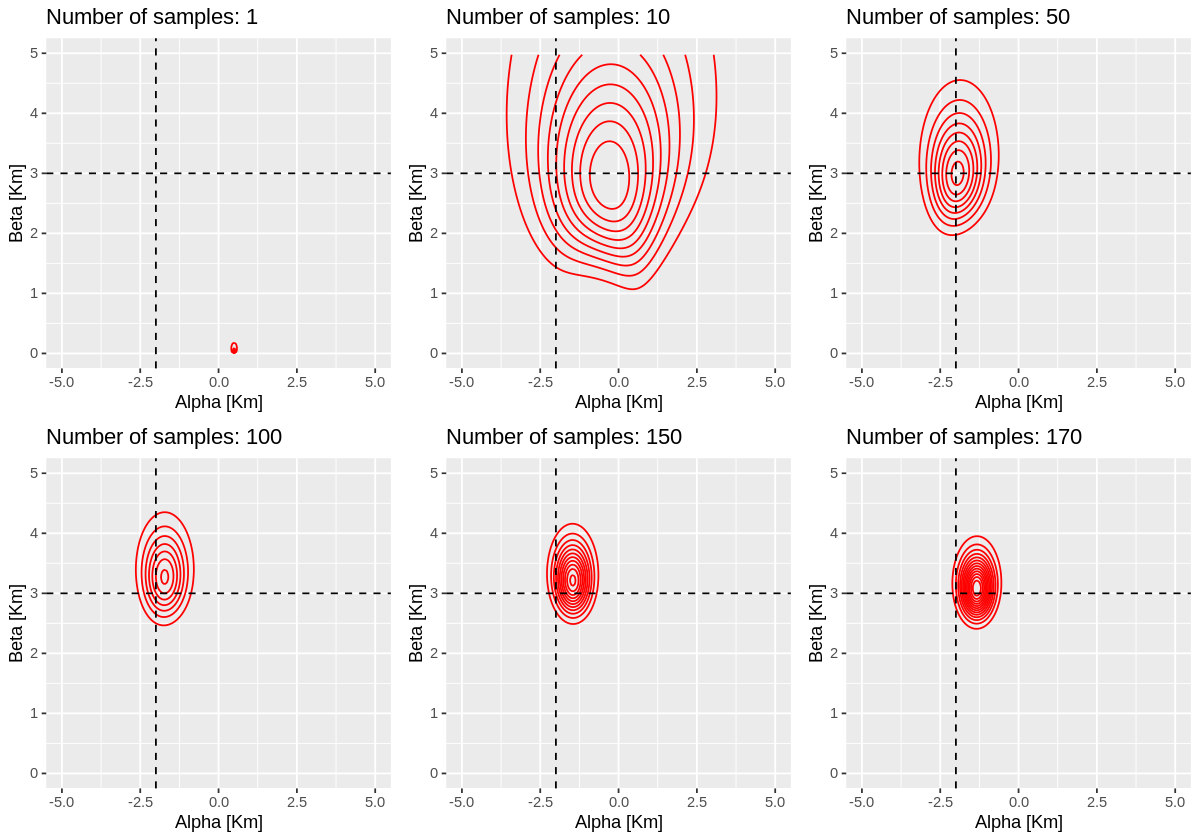

In [16]:
i_ls <-c(1, 10, 50, 100, 150, 170)
options(repr.plot.width = 10, repr.plot.height =3)
plots = lapply(i_ls, function(.i_ls){func(.i_ls)})
options(repr.plot.width = 10, repr.plot.height=7)
do.call(grid.arrange, c(grobs=plots, nrow=2))

In [9]:
dt.mean <- mean(dt)
abline(v=dt.mean, lty=2, lwd=2)

y.band <- (max(y.post) - min(y.post))*0.05
text(-6, max(y.post)+y.band, col='navy', lwd=2, pos=4, paste("Data size:", n.plot, sep=''))
text(-6, max(y.post)-y.band, col='navy', lwd=2, pos=4, sprintf('<x>: %.2f', dt.mean))
text(-6, max(y.post)-3*y.band, col='navy', lwd=2, pos=4, sprintf('Max(P): %.2f', alpha.max))

Warning message in mean.default(dt):
“argument is not numeric or logical: returning NA”


ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


# 4

## 4.1)

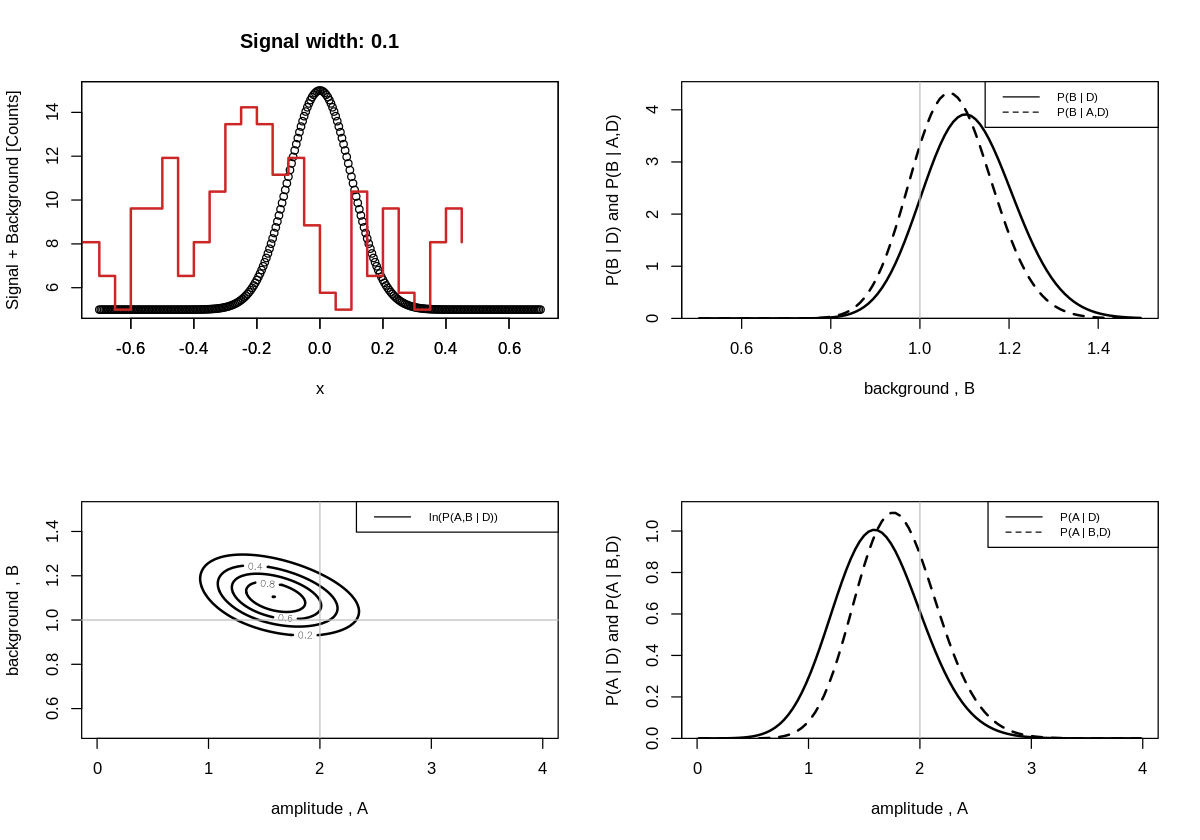

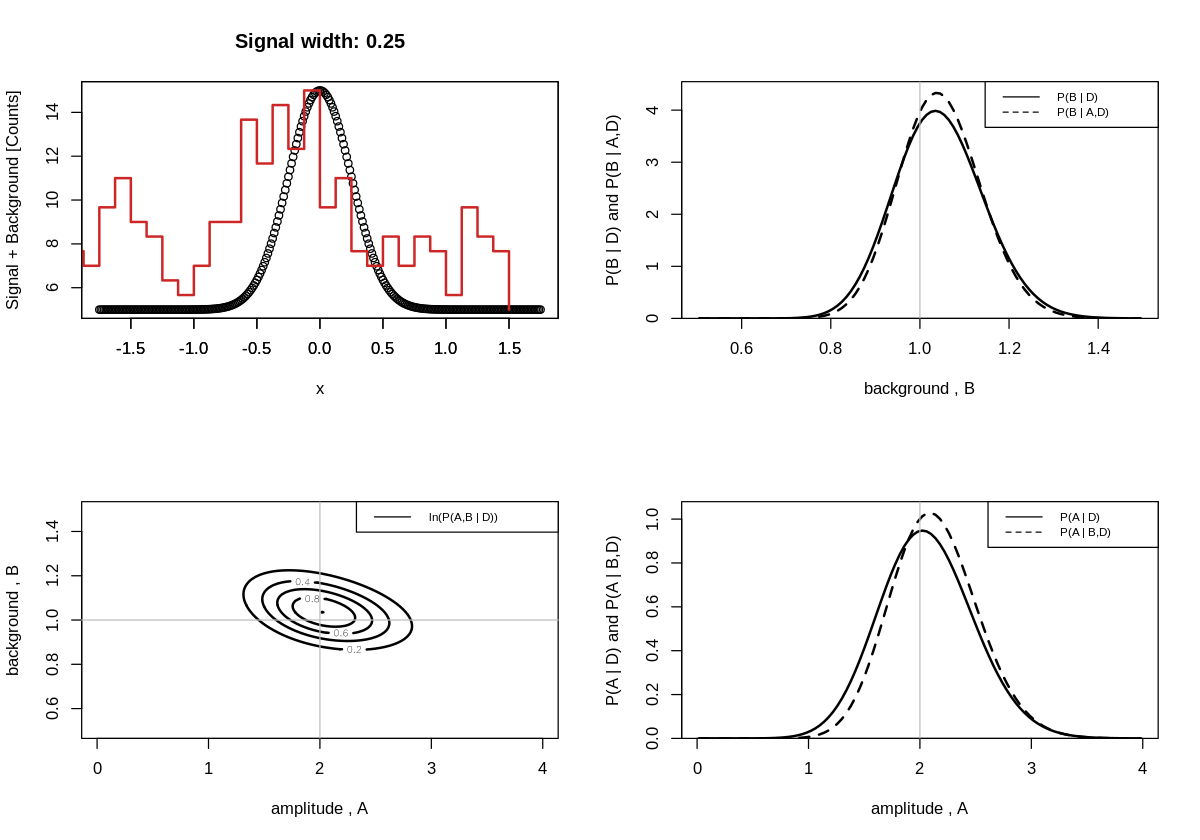

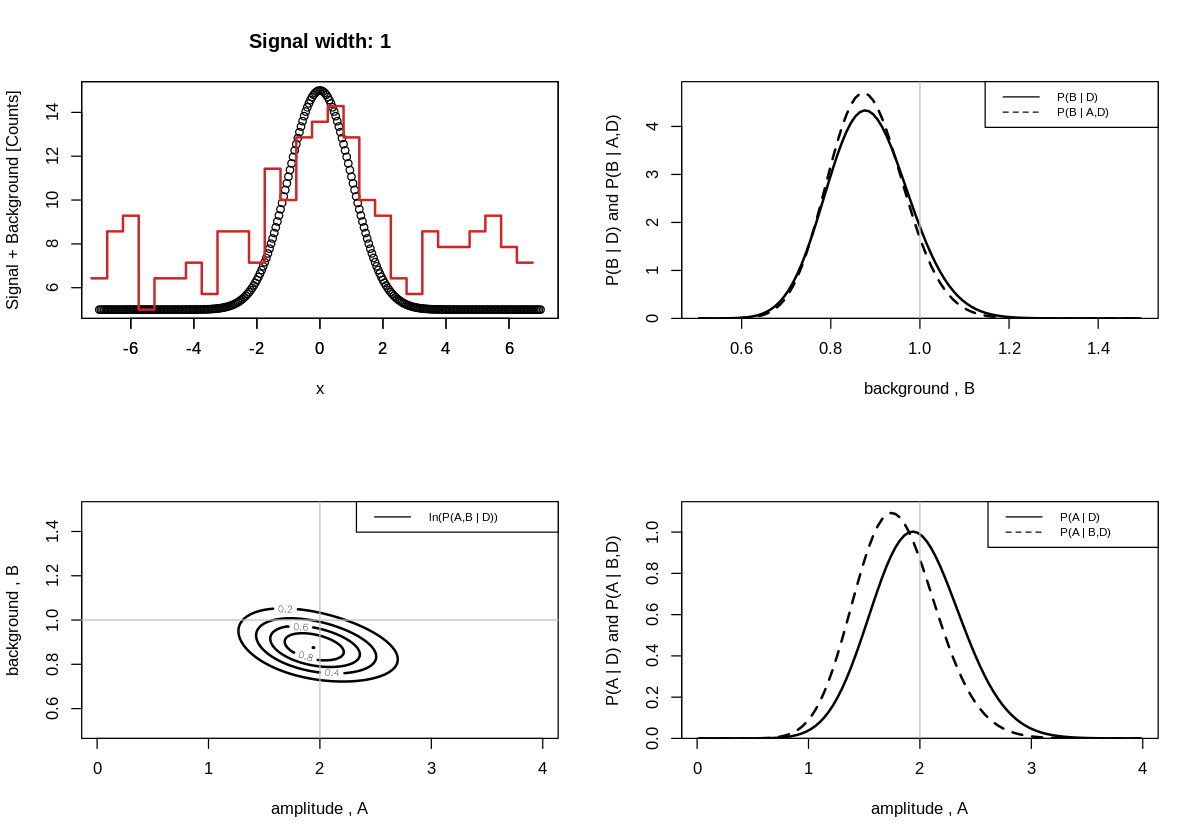

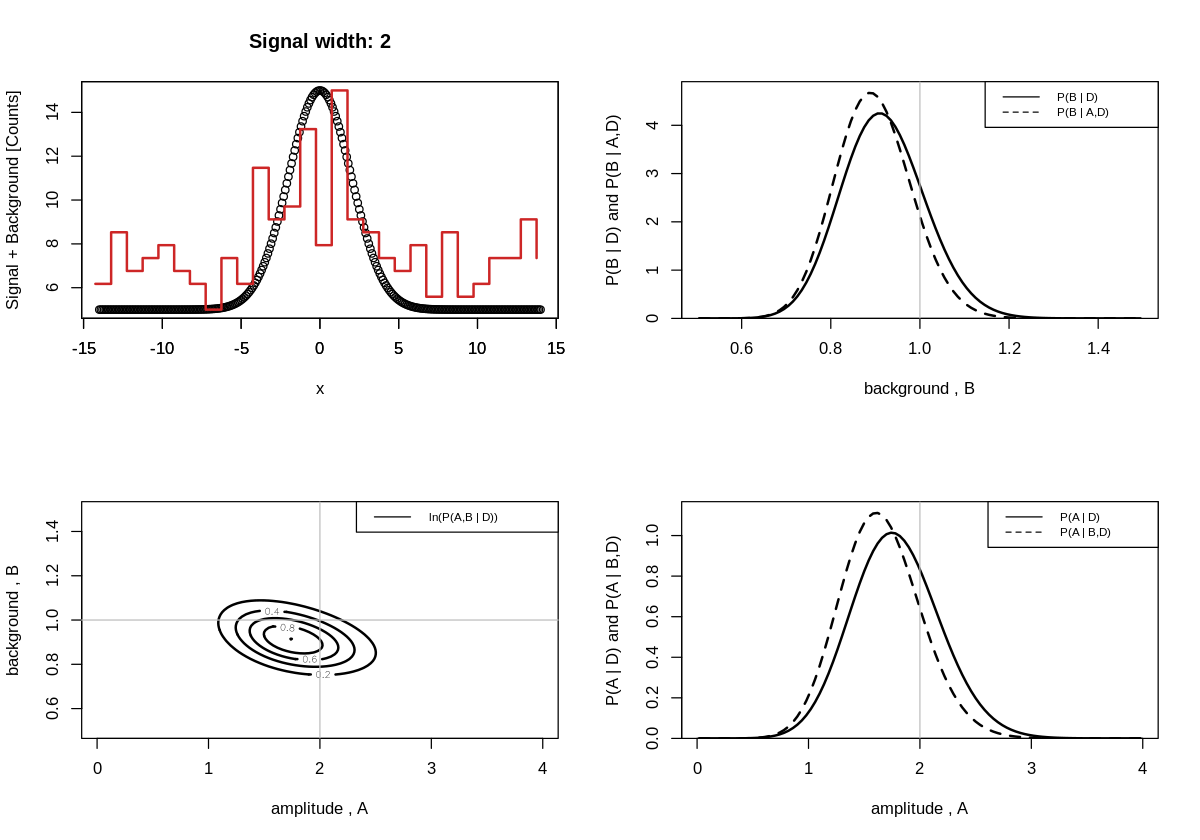

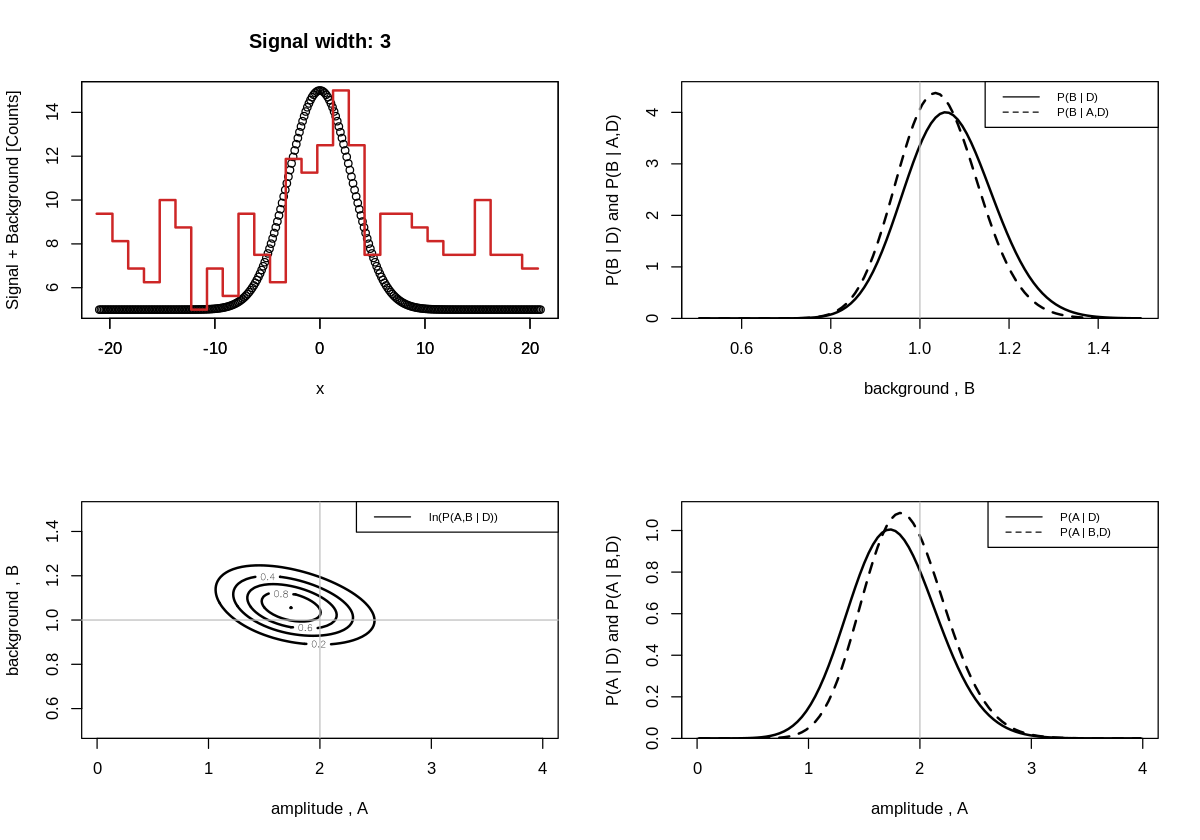

In [18]:
# - Generative model
signal <- function (x, a, b, x0, w, t) {
t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Define model parameters
x0 <- 0 # Signal peak
w <-1 # Signal width
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time

set.seed(205)

omega <- c(0.1, 0.25, 1, 2, 3)

for(w in omega){
    
    layout((matrix(1:4, nrow = 2, ncol = 2)), respect = FALSE) 
    
    #Plotting Signal and Signal+Background
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length (s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A.true , B.true , x0, w, Delta.t)
    plot(xplot , splot, xlab="x", ylab="Signal + Background [Counts]", main = paste("Signal width:", w))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    plot(xdat.off , ddat , type='s',col='firebrick 3',
        lwd=2, xlim=range(xplot), ylim=range(c(splot , ddat)), ylab='', xlab='', yaxt="n")
    
    # - Sampling grid for computing posterior
    alim <- c(0.0, 4.0)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),
    to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    b <- blim[1] + diff(blim )* uniGrid


    # Log posterior
    log.post <- function (d, x, a, b, x0, w, t) {
        if(a<0 || b <0) {return(-Inf )} # the effect of the prior
        sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
        }

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow= length (a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }

    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour (a, b, exp(z),
        nlevels = 5,
        labcex = 0.5,
        lwd = 2,
        xlab="amplitude , A",
        ylab="background , B")
    legend(x = 'topright', legend=c('ln(P(A,B | D))'), lty=c(1), cex = 0.7, box.lty=1)

    abline(v=2,h=1,col="grey")
    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter . Normalize by gridding .
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters . Vectorize (func , par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true ,
            x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")(ddat , xdat , A.true , b,
            x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))
    
    #par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i",
        ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)",
        type="l", lwd=2)
    lines(b, p_b_aD , lwd=2, lty=2)
    abline(v=B.true , col="grey")
    legend(x = 'topright',legend=c('P(B | D)', 'P(B | A,D)' ), lty=c(1, 2), cex = 0.7, box.lty=1)

    plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
        ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)",
        type="l", lwd=2)
    lines(a, p_a_bD , lwd=2, lty=2)
    abline(v=A.true , col="grey")
    legend( x = 'topright', legend=c('P(A | D)', 'P(A | B,D)'), lty=c(1, 2), cex = 0.7, box.lty=1)
}

## 4.2)

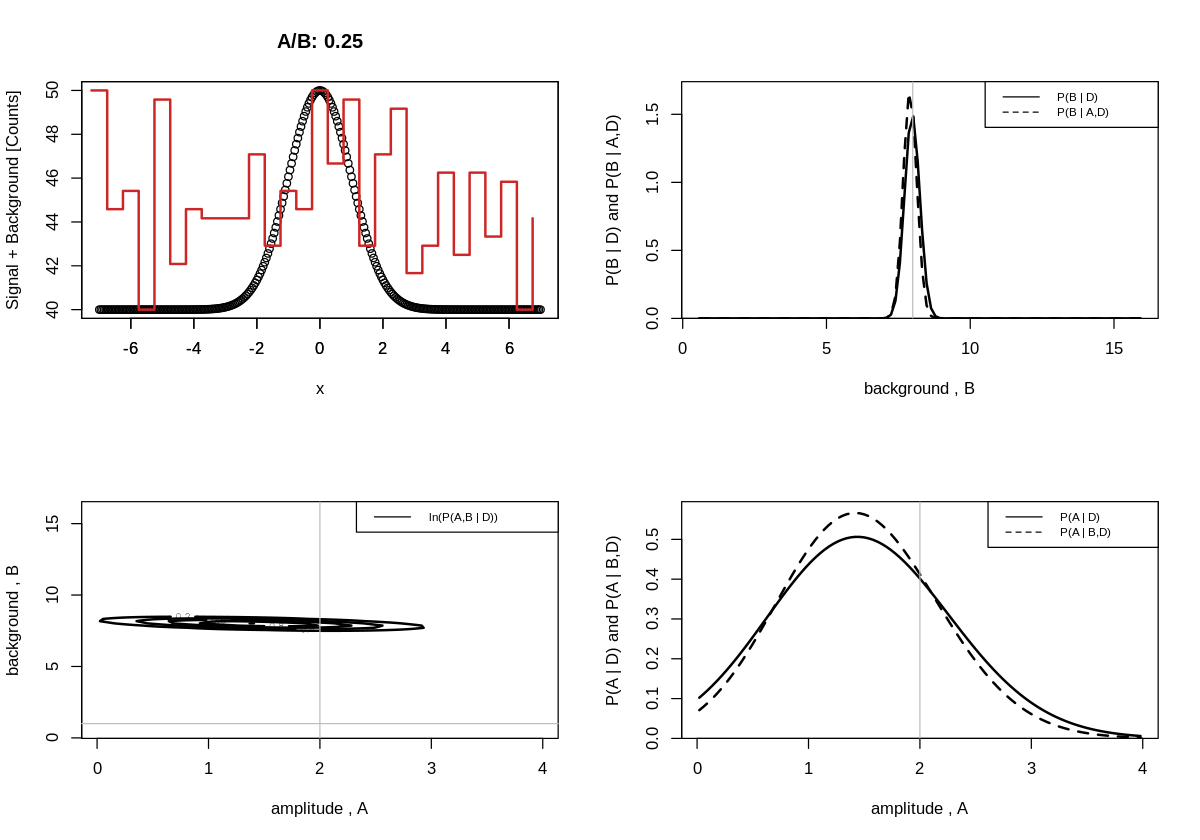

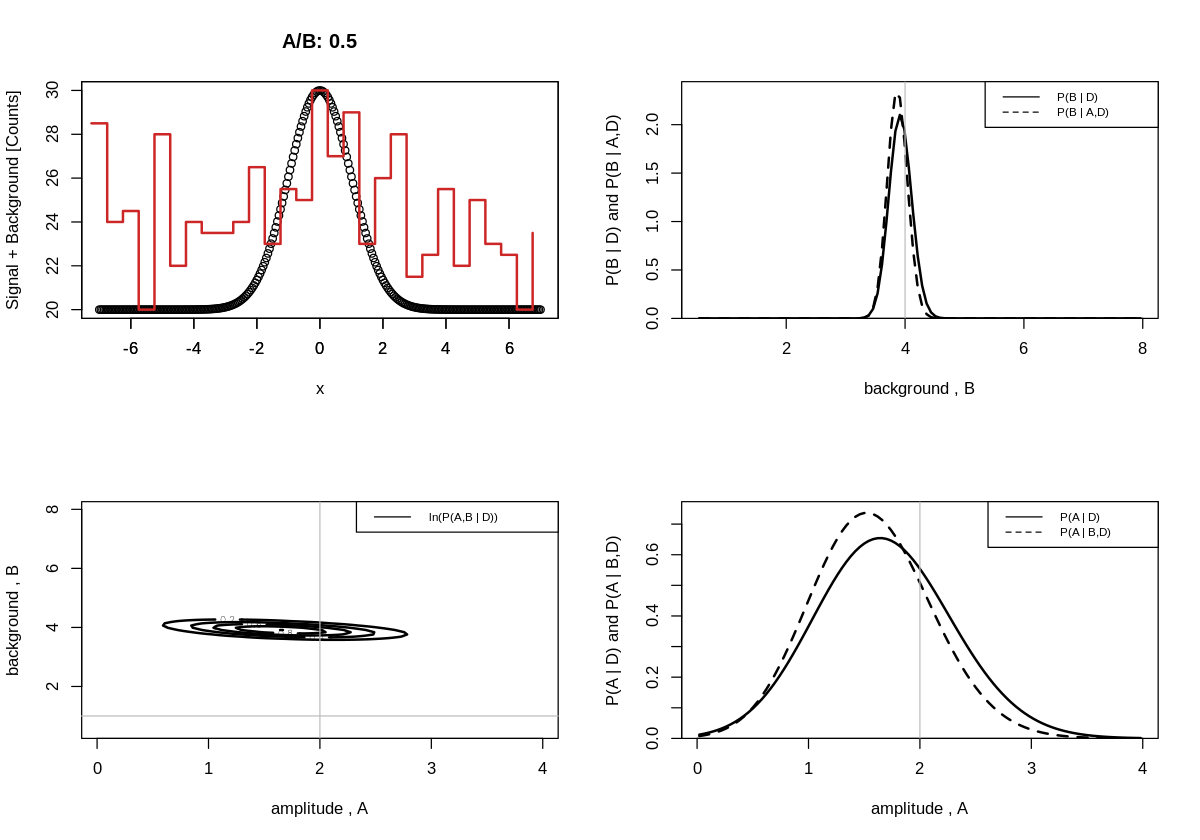

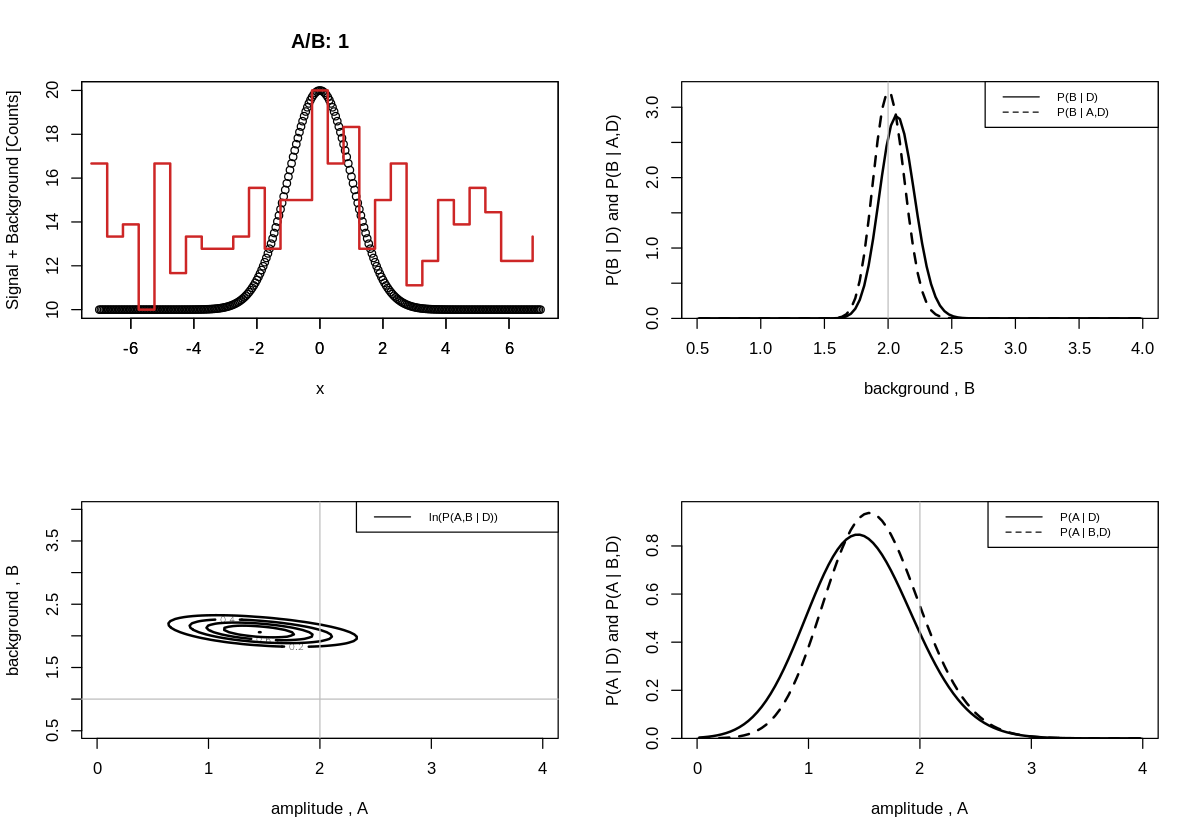

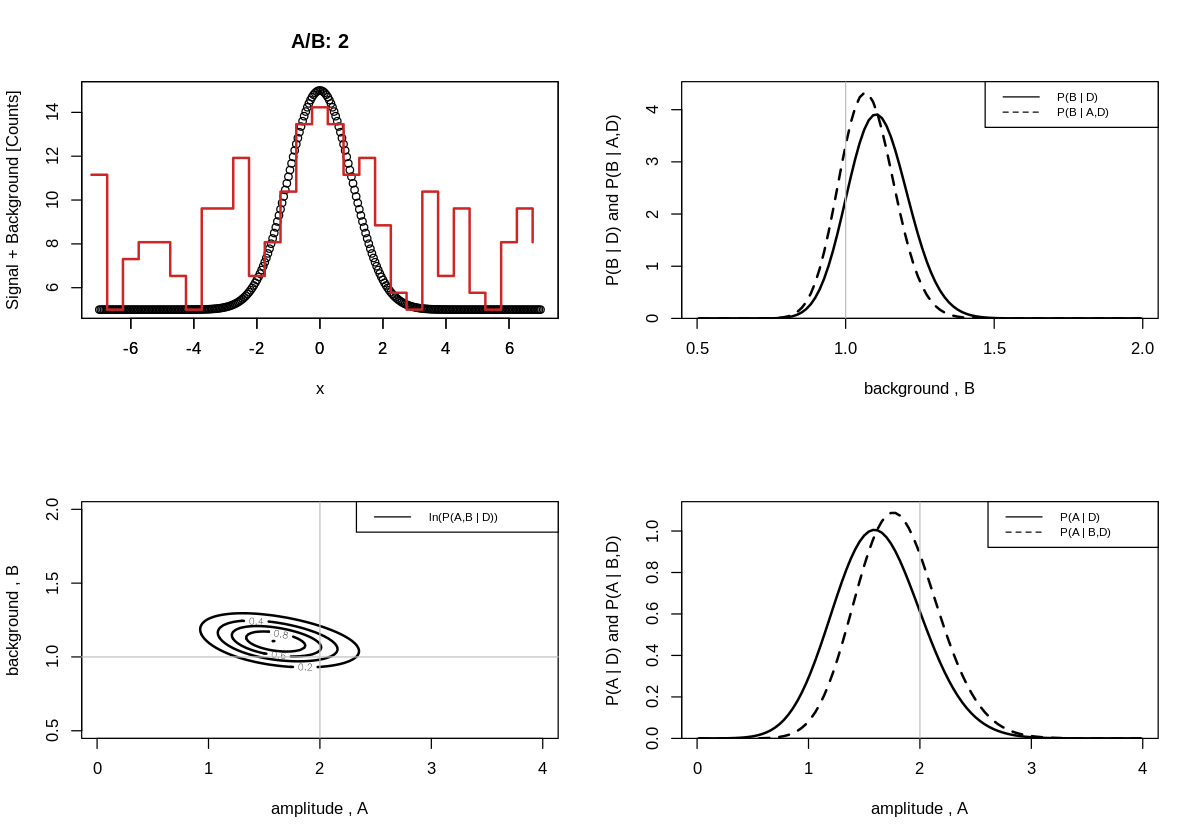

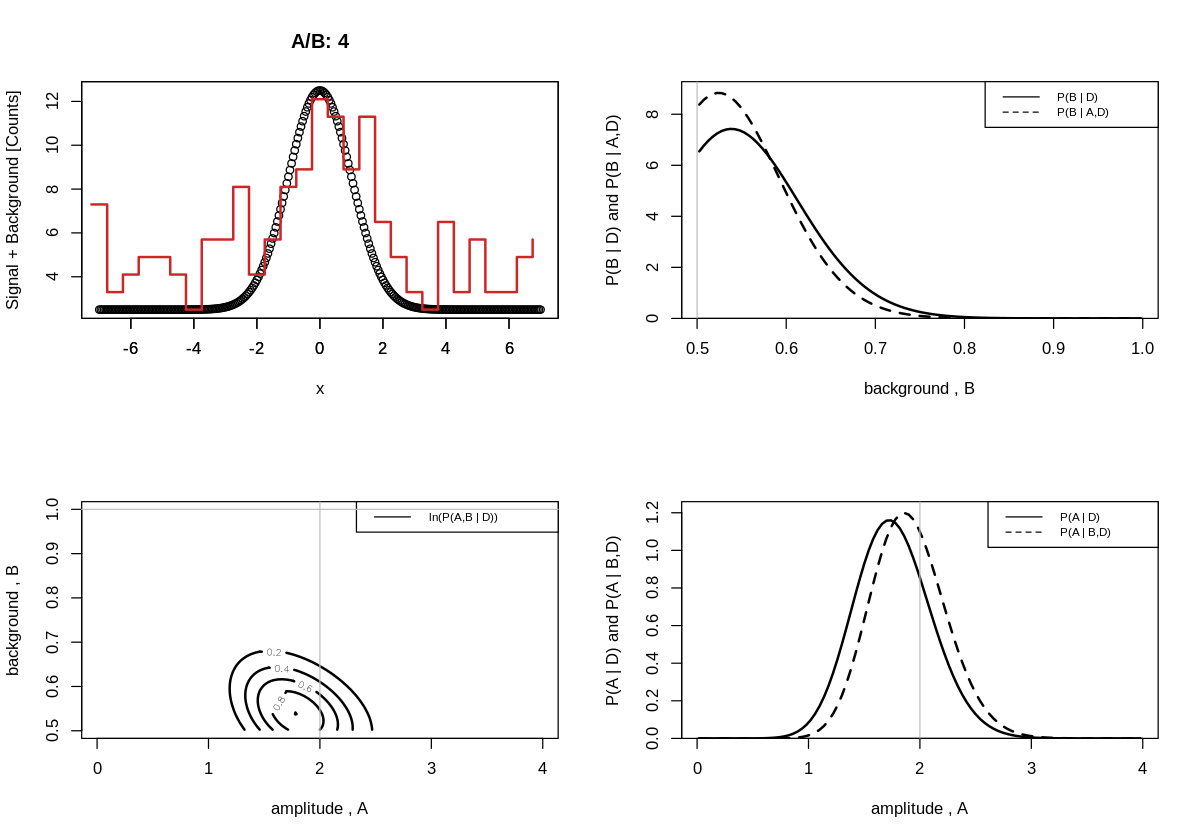

In [19]:
ratio_AB <- c(1/4, 1/2, 1, 2, 4)

for (ratio in ratio_AB){ 

    layout((matrix(1:4, nrow = 2, ncol = 2)), respect = FALSE) 
    
    # - Generative model
    signal <- function (x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
    }

    # Define model parameters
    x0 <- 0 # Signal peak
    w <-1 # Signal width
    A.true <- 2 # Signal amplitude
    B.true <- A.true * ratio^(-1) # Background amplitude
    Delta.t <- 5 # Exposure time

    set.seed(205)
    
    #Plotting Signal and Signal+Background
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length (s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A.true , B.true , x0, w, Delta.t)
    plot(xplot , splot, xlab="x", ylab="Signal + Background [Counts]", main = paste("A/B:", ratio))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    plot(xdat.off , ddat , type='s',col='firebrick 3',
        lwd=2, xlim=range(xplot), ylim=range(c(splot , ddat)), ylab='', xlab='', yaxt="n")
    
    # - Sampling grid for computing posterior
    alim <- c(0.0, 2*A.true)
    blim <- c(0.5, 2*B.true)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),
    to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim)* uniGrid
    b <- blim[1] + diff(blim)* uniGrid


    # Log posterior
    log.post <- function (d, x, a, b, x0, w, t) {
        if(a<0 || b <0) {return(-Inf )} # the effect of the prior
        sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
        }

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow= length (a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }

    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour (a, b, exp(z),
        nlevels = 5,
        labcex = 0.5,
        lwd = 2,
        xlab="amplitude , A",
        ylab="background , B")
    legend(x = 'topright', legend=c('ln(P(A,B | D))'), lty=c(1), cex = 0.7, box.lty=1)
    abline(v=2,h=1,col="grey")
    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter . Normalize by gridding .
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters . Vectorize (func , par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true ,
            x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")(ddat , xdat , A.true , b,
            x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))
    
    #par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i",
        ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)",
        type="l", lwd=2)
    lines(b, p_b_aD , lwd=2, lty=2)
    abline(v=B.true , col="grey")
    legend(x = 'topright',legend=c('P(B | D)', 'P(B | A,D)' ), lty=c(1, 2), cex = 0.7, box.lty=1)

    plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
        ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)",
        type="l", lwd=2)
    lines(a, p_a_bD , lwd=2, lty=2)
    abline(v=A.true , col="grey")
    legend( x = 'topright', legend=c('P(A | D)', 'P(A | B,D)'), lty=c(1, 2), cex = 0.7, box.lty=1)
}

# Resume

In [20]:
library(gridExtra)
l <- list(plt_Unif, plt_Jeffrey, plt_norm, plt_23)
ggsave('ex4_plot_resume.pdf', width = 8.33, height = 11.7, dpi=300, marrangeGrob(grobs = l, nrow=2, ncol=1), device = "pdf")